## 통계분석과 기계학습

통계분석
- 통계분석은 데이터로부터 모델을 만들어 현상을 설명하고 이해하는데 중점
- 단순하고 해석 가능한 형태, 이 모델들은 명확한 가정(예: 정규성, 독립성, 등분산성)에 기반하고, 이러한 가정들은 모델의 유효성을 판단하는 데 중요
- 통계분석의 결과는 데이터에 대한 해석과 추론에 중점

기계학습
- 데이터로부터 패턴을 학습하여 미래 데이터에 대한 예측을 하는 데 중점
- 복잡하고, 통계적 가정보다는 예측 성능에 초점을 둔다. 이러한 모델들은 때로 해석하기 어려울 수 있으며, "블랙 박스"로 간주
- 기계학습의 결과는 주로 예측의 정확도와 모델의 성능에 중점. 해석 가능성보다는 예측 성능이 더 중요한 역할


## 기계학습에 필요한 통계
- 데이터 탐색과 전처리 : 기술통계, 시각화, 상관분석
- 가설 검정과 통계적 유의성 : 기계학습 모델의 특성이나 결과에 대한 가설을 설정하고 검정할 때 사용. 예를들어 두 모델의 성능 차이가 통계적으로 유의미한지 판단하는 t-검정 같은 방법이 사용.
- 모델 선택과 평가 : 교차 검증, 모델의 일반화 성능을 평가하는데 중요
- 특성 선택과 차원 축소 : 변수선택, 주성분 분석(PCA) 등 차원축소와 관련된 의사결정에 도움
- 확률적 모델링 : 베이지안 방법론과 확률적 프레임워크는 기계학습에서 불확실성을 모델링하고 추론하는데 사용.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m3_분석라이브러리/통계/ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   student number  50 non-null     int64
 1   english         50 non-null     int64
 2   mathematics     50 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


In [ ]:
scores =  np.array(df.english)[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [ ]:
scores_df = pd.DataFrame({'score':scores}, index=list('ABCDEFGHIJ'))
scores_df.head()

,score
A,42
B,69
C,56
D,41
E,57


In [ ]:
scores_df = pd.DataFrame({'score':scores},
                         index=pd.Index(list('ABCDEFGHIJ'), name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [ ]:
# scores의 평균값 - 배열
sum(scores)/len(scores)
np.mean(scores)

55.0

In [ ]:
# 평균값 - 데이터프레임 scores_df
scores_df.mean()

score    55.0
dtype: float64

In [ ]:
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [ ]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [ ]:
# 중앙값 : 요소개수가 짝수면 가운데 두개 더해서 나누기 2
np.median(scores)
scores_df.median()

score    56.5
dtype: float64

In [ ]:
np.arange(11)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Q. median을 구하는 방법을 코드로 작성하세요.(두가지 조건 감안)

In [ ]:
# A.
num = np.random.randint(1)
a = np.arange(num)
if num % 2 == 0 :
  m = (a[num // 2 - 1] + a[num // 2]) / 2
else :
  m = a[(num+1)//2 -1]
m

IndexError: index -1 is out of bounds for axis 0 with size 0

In [ ]:
# median
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0+m1) / 2
else :
    median = sorted_scores[(n+1)//2-1]
median

56.5

In [ ]:
# 최빈값
scores_df.mode()

,score
0,65


In [ ]:
pd.Series(sorted_scores).mode()

0    65
dtype: int64

In [ ]:
scores_df.describe()

,score
count,10.000000
mean,55.000000
std,9.775252
min,41.000000
25%,48.250000
50%,56.500000
75%,63.250000
max,69.000000


<Axes: xlabel='score', ylabel='Count'>

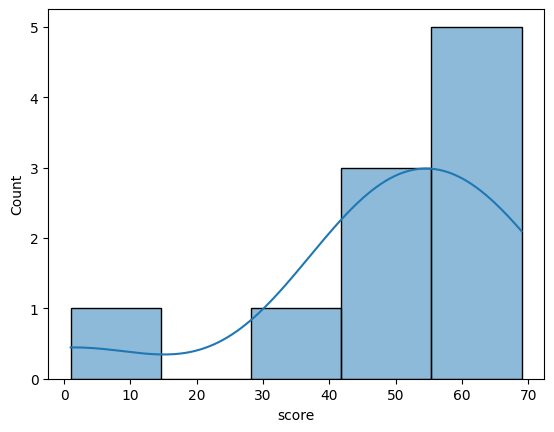

In [ ]:
# 평균값 < 중앙값
import seaborn as sns
scores_df_a = scores_df.copy()
# print(scores_df_a)
scores_df_a.iloc[9,0] = 1
# print(scores_df_a)
sns.histplot(data=scores_df_a, x='score', kde=True)

In [ ]:
scores_df_a.describe()

,score
count,10.000000
mean,49.300000
std,19.556471
min,1.000000
25%,43.500000
50%,52.500000
75%,63.000000
max,69.000000


<Axes: xlabel='score', ylabel='Count'>

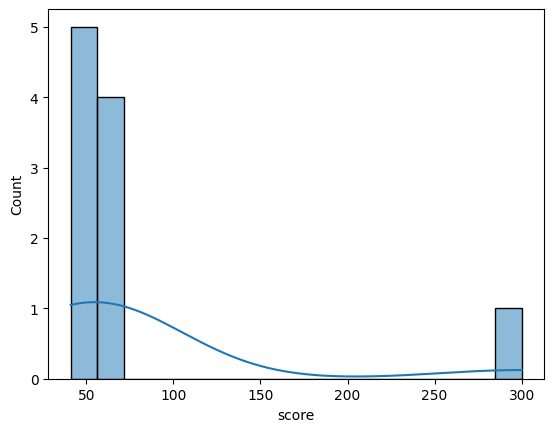

In [ ]:
# 평균값 > 중앙값
scores_df_b = scores_df.copy()
scores_df_b.iloc[9,0] = 300
sns.histplot(data=scores_df_b, x='score', kde=True)

중앙값과 평균값간의 관계에 대한 인사이트
1. 평균값 < 중앙값
- 데이터 분포가 왼쪽으로 치우쳐 있음. 음의 왜곡 분포
- 왼쪽 꼬리가 긴 분포에서는, 극단적으로 낮은 값들이 평균을 중앙값보다 낮게 끌어내립니다.
- 예시: 소득 데이터에서 대부분의 사람들은 중간 수준의 소득을 가지지만, 매우 낮은 소득을 가진 소수의 사람들로 인해 평균 소득이 중앙 소득보다 낮아질 수 있음.
- scores_df_a.iloc[9,0] = 1 를 통해서 극단적으로 작은 데이터를 넣음.
<br><br>
2. 평균값 < 중앙값
- 데이터가 오른쪽으로 치우쳐 있음. 양의 왜곡 분포
- 오른쪽 꼬리가 긴 분포에서, 극단적으로 높은 값들이 평균을 중앙값보다 높게 밀어 올림.
- 예시: 부의 분포에서 소수의 매우 부유한 사람들로 인해 평균 부가 중앙값보다 높을 수 있음.
- scores_df_b.iloc[9,0] = 300 를 통해서 극단적으로 큰 데이터를 넣음.
<br><br>
3. 평균값 = 중앙값
- 데이터가 대칭적으로 분포되어 있음.
- 정규분포, 균일분포와 같은 대칭적인 분포
- 평균과 중앙값이 같다고 해서 항상 완벽한 대칭을 의미하는 것은 아니지만, 대칭에 가까운 분포임을 나타냄

추가
- 평균값은 극단값(아주 크거나 작은 값)에 민감하지만, 중앙값은 그렇지 않음.

중앙값 > 평균값

- 데이터는 일반적으로 왼쪽으로 치우친(왼쪽 꼬리가 긴) 분포를 가진다. 이러한 분포를 '왼쪽으로 치우친 분포' 또는 '음의 왜곡 분포'라고 한다.
- 특징: 데이터의 낮은 값(왼쪽 꼬리)에 이상치나 극단적인 낮은 값들이 존재할 수 있다.
- 예시: 적은 수의 매우 낮은 소득을 가진 사람들이 있는 소득 데이터. 이러한 극단적으로 낮은 값들은 평균을 중앙값보다 더 낮게 끌어내린다.

평균값 > 중앙값

- 데이터는 오른쪽으로 치우친(오른쪽 꼬리가 긴) 분포를 가진다. 이를 '오른쪽으로 치우친 분포' 또는 '양의 왜곡 분포'라고 한다.
- 특징: 데이터의 높은 값(오른쪽 꼬리)에 이상치나 극단적인 높은 값들이 존재한다.
- 예시: 적은 수의 매우 높은 소득을 가진 사람들이 있는 소득 데이터. 이러한 극단적으로 높은 값들은 평균을 중앙값보다 더 높게 밀어올린다.

중요성

평균과 중앙값 사이의 차이는 데이터의 비대칭성을 나타내며 이 차이가 클수록 데이터 분포의 왜곡이 더 크다고 볼 수 있다. 데이터 분석에서는 이러한 왜곡을 인지하고 적절한 해석과 분석 방법을 선택하는 것이 중요. 예를 들어, 이상치나 극단적인 값이 데이터의 해석에 큰 영향을 미칠 수 있으므로, 이를 고려하여 분석을 진행.

Q. 다음 사항을 수행하세요.
- 평균 50, 표준편차 10인 정규분포에서 100개 샘플 생성
- 기본 데이터의 평균과 중앙값 계산
- 데이터에 이상치 500 추가
- 이상치에 포함된 데이터의 평균과 중앙값 계산
- 이상치 포함에 따른 평균값과 중앙값간의 변화 설명

       Values
0   56.978329
1   39.930201
2   62.540176
3   47.294399
4   49.897960
..        ...
95  48.540976
96  52.327344
97  44.104468
98  60.386172
99  57.312426

[100 rows x 1 columns]


,Values
count,100.000000
mean,49.946406
std,10.625913
min,25.674938
25%,42.673112
50%,49.691546
75%,57.061853
max,83.262516


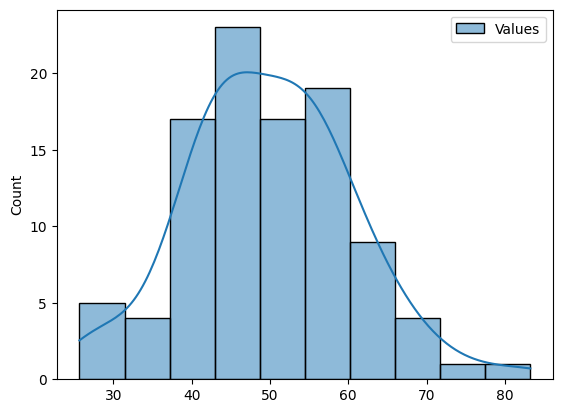

In [ ]:
# A.
data = np.random.normal(50,10, size=100)
df = pd.DataFrame(data, columns=['Values'])
print(df)
sns.histplot(data=df, kde=True)
df.describe()

<ipython-input-83-df0663312915>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(outlier, ignore_index=True)  # 이상치 추가


          data  Values
0    40.863342     NaN
1    49.375103     NaN
2    61.192969     NaN
3    35.516628     NaN
4    39.924895     NaN
..         ...     ...
96   51.957973     NaN
97   49.218179     NaN
98   57.468734     NaN
99   32.337500     NaN
100        NaN   500.0

[101 rows x 2 columns]


,data,Values
count,100.000000,1.0
mean,50.063803,500.0
std,9.651578,NaN
min,32.337500,500.0
25%,40.844448,500.0
50%,50.754491,500.0
75%,57.512550,500.0
max,80.241838,500.0


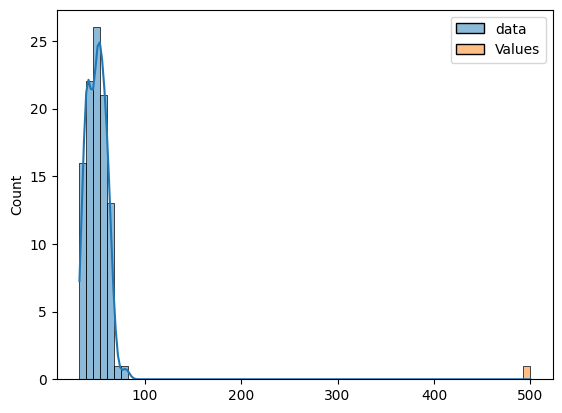

In [ ]:
df1 = df.copy()
outlier = pd.DataFrame({'Values': [500]})  # 이상치를 포함하는 새로운 DataFrame
df1 = df1.append(outlier, ignore_index=True)  # 이상치 추가
print(df1)
sns.histplot(data=df1, kde=True)
df1.describe()

평균:  [50.06380312] 중앙값:  [50.75449093]
평균:  [54.6551697] 중앙값:  [50.92389827]


Text(0.5, 1.0, 'outlier data')

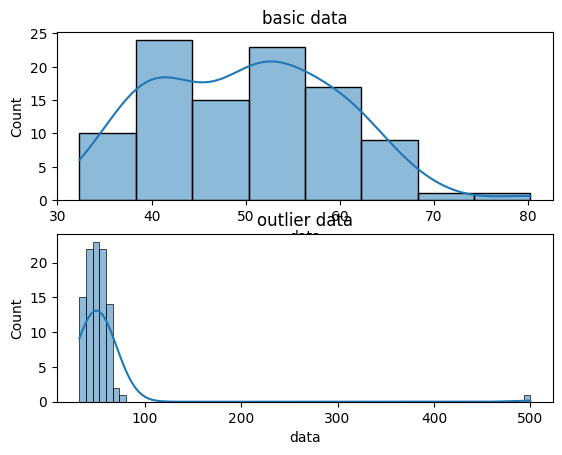

In [ ]:
# A. 영우님 솔루션
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#평균50, 표준편차 10인 정규 분포에서 100개 샘플 생성
data = np.random.normal(50, 10, 100)
df = pd.DataFrame({'data':data})
df.describe()

#기본 데이터의 평균과 중앙값 계산
print('평균: ', df.mean().values, '중앙값: ', df.median().values)

#데이터에 이상치 500 추가
df_copy = df.copy()
df_copy.iloc[0:1] = 500

# 이상치가 포함된 데이터의 평균과 중앙값 계산
print('평균: ', df_copy.mean().values, '중앙값: ', df_copy.median().values)

# 이상치 포함에 따른 평균값과 중앙값간의 변화 설명
fig, axes = plt.subplots(2,1)
plot1 = sns.histplot(data=df, x='data', kde=True, ax=axes[0])
plot1.set_title('basic data')
plot2 = sns.histplot(data=df_copy, x='data', kde=True, ax=axes[1])
plot2.set_title('outlier data')

In [ ]:
import numpy as np

# 임의의 데이터 세트 생성
data = np.random.normal(50, 10, 100)  # 평균 50, 표준편차 10인 정규 분포에서 100개 샘플 생성

# 기본 데이터의 평균과 중앙값 계산
mean_initial = np.mean(data)
median_initial = np.median(data)

# 이상치 추가
data_with_outlier = np.append(data, [500])  # 데이터에 이상치 500 추가

# 이상치가 포함된 데이터의 평균과 중앙값 계산
mean_with_outlier = np.mean(data_with_outlier)
median_with_outlier = np.median(data_with_outlier)

mean_initial, median_initial, mean_with_outlier, median_with_outlier

(48.91184236284079, 48.36510799345271, 53.37806174538692, 48.572572420141164)

의미와 중요성

- 이상치의 영향: 평균값은 이상치에 의해 크게 왜곡될 수 있다. 예를 들어, 소득 데이터에서 몇몇 매우 높은 값(억만장자의 소득)이 평균을 크게 올릴 수 있지만, 중앙값은 이러한 극단적인 값의 영향을 덜 받는다.
- 데이터 분포의 대표성: 중앙값은 데이터의 분포가 비대칭일 때 데이터의 "중심"을 더 잘 나타내는 경향이 있다. 반면, 평균값은 데이터가 대칭적인 분포를 가질 때 중심 경향을 잘 나타낸다.
- 데이터 해석: 데이터 분석에서는 종종 평균값과 중앙값을 함께 사용하여 데이터의 분포를 더 잘 이해한다. 두 척도 사이에 큰 차이가 있다면, 이는 데이터에 이상치나 극단적인 값이 있다는 신호일 수 있다.
따라서 평균값과 중앙값을 선택할 때는 데이터의 특성과 분석의 목적을 고려해야 하며 이상치가 존재하거나 데이터가 비대칭적인 분포를 가질 경우, 중앙값이 더 적절할 수 있다. 반면, 데이터가 정규 분포를 이루는 경우, 평균값이 데이터를 대표하는 데 적합할 수 있다.

분산(Variance)과 표준편차(Standard Deviation)
- 통계학에서 데이터의 분포를 측정하는 데 사용되는 두 가지 중요한 개념.
- 이들은 데이터가 평균값으로부터 얼마나 퍼져 있는지(즉, 얼마나 분산되어 있는지)를 나타낸다.
- 분산과 표준편차는 데이터의 변동성을 이해하는 데 중요한 도구이며 이러한 측정값을 통해 데이터 집합의 일관성과 예측 가능성을 파악할 수 있다.

분산 (Variance)
- 정의: 데이터 포인트들이 평균에서 얼마나 멀리 떨어져 있는지를 측정하는 값.수학적으로 분산은 각 데이터 포인트와 평균값의 차이를 제곱한 후, 이를 모든 데이터 포인트의 개수로 나누어 평균을 낸 값.
- 의미: 분산이 크다는 것은 데이터 포인트들이 평균에서 멀리 떨어져 있다는 것을 의미하며, 이는 데이터가 넓게 퍼져 있다는 것을 나타낸다. 분산이 작다는 것은 데이터 포인트들이 평균값에 가깝게 모여 있다는 것을 의미하며 이는 데이터가 좁게 집중되어 있다는 것을 나타낸다.

표준편차 (Standard Deviation)
- 정의: 표준편차는 분산의 제곱근으로, 데이터 포인트들이 평균에서 얼마나 멀리 떨어져 있는지를 나타내는 또 다른 방법.
분산의 단위는 원래 데이터의 단위의 제곱이 되지만, 표준편차는 원래 데이터와 동일한 단위를 갖는다.
- 의미: 표준편차가 크다는 것은 데이터 포인트들이 평균에서 멀리 떨어져 있다는 것을 의미하며, 데이터가 넓게 분포되어 있다는 것을 나타낸다. 표준편차가 작다는 것은 데이터 포인트들이 평균값에 가까이 모여 있다는 것을 의미하며, 데이터가 좁게 집중되어 있다는 것을 나타낸다.

In [ ]:
# 데이터의 산포도 지표
# 분산과 표준편차
# 편차(deviation)
print(scores_df.describe, '\n')
mean = np.mean(scores)

print(mean)
print(scores)
deviation = scores - mean
print(deviation)

<bound method NDFrame.describe of          score
student       
A           42
B           69
C           56
D           41
E           57
F           48
G           65
H           49
I           65
J           58> 

55.0
[42 69 56 41 57 48 65 49 65 58]
[-13.  14.   1. -14.   2.  -7.  10.  -6.  10.   3.]


In [ ]:
sum(deviation)

0.0

In [ ]:
np.mean(deviation)

0.0

#### 분산
- 불편분산 : 불편분산(Unbiased Variance)은 표본 데이터를 사용하여 모집단의 분산을 추정할 때 편향을 최소화하기 위해 사용되는 개념
 * 일반적으로 표본 분산은 모분산을 과소평가하는 경향이 있는데, 불편분산은 이러한 편향을 조정
- Numpy와 Pandas는 서로 다른 분산을 기본으로 설정하여 계산.
 * Numpy는 표본분산, Pandas는 불편분산
 * Pandas에서 표본분산을 계산하려면 var 메소드의 인수를 ddof=0이라고 설정, 불편분산은 ddof=1일 때 해당됨

[표본분산이 분산을 과소평가하는 이유]

- 분산은 '데이터와 평균값의 간의 거리' 이므로 모평균 간의 거리를 계산 : np.sum((fish_data - mu)**2)/N  
호수안에 물고기가 7마리 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4,  
샘플링 3마리 {1,2,3} 표본평균 2  
이때(샘플을 뽑을때 대부분 실제 모평균을 모름. 지금은 간단 한 예를 든것임.) 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N 대신 N-1로 나누어 불편분산을 구할 수 있다.


In [ ]:
# 모분산
fish_data = [1,2,3,4,5,6,7]
mu = 4
div = []
for f in fish_data :
  div.append((f-mu)**2)
print(div, '\n')
sum(div)/len(fish_data)

[9, 4, 1, 0, 1, 4, 9] 



4.0

In [ ]:
# 표본분산
sample = [1,2,3]
print(sample)
mu = 2
div = []
for f in sample :
  div.append((f-mu)**2)
print(div, '\n')
sum(div)/len(sample)

[1, 2, 3]
[1, 0, 1] 



0.6666666666666666

In [ ]:
# 넘파이 - 불편분산
print(np.mean(deviation ** 2))
np.var(scores)

86.0


86.0

In [ ]:
# 판다스 - 불편분산
scores_df.var()

score    95.555556
dtype: float64

In [ ]:
# 넘파이 - 불편분산
print(np.var(scores, ddof=0))
np.var(scores, ddof=1)

86.0


95.55555555555556

Q. 평균 0, 표준편차 1인 정규 분포에서 30개 샘플 생성해서 표본분산과 불편분산을 구하세요.

In [ ]:
data = np.random.normal(0,1, size=30)
# df = pd.DataFrame({'data':data})

# 표본분산
var1 = np.var(data,ddof=0)

# 불편분산
var2 = np.var(data,ddof=1)
var1, var2

(0.9100271703101949, 0.9414074175622705)

Q. 다음 사항을 수행하여 표본 분산이 모집단 분산을 과소 평가하는 경향이 있음을 검증하세요.
- 1000개의 데이터 포인트를 가진 정규 분포 모집단에서 1000번의 표본(각각 30개의 데이터 포인트)을 추출
- 각 표본의 분산을 계산
- 표본 분산의 평균은 모집단 분산보다 약간 작다.

In [ ]:
# A. 영우님 솔루션
import numpy as np

# 10000개의 데이터 포인트를 가진 정규 분포 모집단에서 1000번의 표본 (각각 30개의 데이터 포인트)을 추출
data = np.random.normal(0, 1, 10000)
sample = np.random.choice(data, 1000)

# 각 표본의 분산을 계산
# 모분
mu = np.mean(data)
div = []
for d in data:
  div.append((d-mu)**2)
print('모분: ', sum(div)/len(data))

# 표준분산
mu = np.mean(sample)
div = []
for s in sample:
  div.append((s-mu)**2)
print('표준분산: ', sum(div)/len(sample))

모분:  1.0103217553922965
표준분산:  0.9826476043685978


In [ ]:
data = np.random.normal(0,1, 10000)
sample = np.random.choice(data,1000)

# 모분산
mu = np.mean(data)
div = []
for i in data:
  div.append((i-mu)**2)
print('모분산: ', sum(div)/len(data))

# 표준분산
mu = np.mean(sample)
div = []
for j in sample :
  div.append((j-mu)**2)
print('표준분산: ', sum(div)/len(sample))

모분산:  0.996823230873172
표준분산:  0.9378987938635908


In [ ]:
# 범위와 4분위수
# 범위
# 최댓값에서 최솟값을 뺀 값
np.max(scores) - np.min(scores)

28

In [ ]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

In [ ]:
# 데이터의 시각화
df = pd.read_csv('/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m3_분석라이브러리/통계/ch2_scores_em.csv', index_col='student number')

english_scores = np.array(df.english)
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [ ]:
# 도수분포표
freq, _=np.histogram(english_scores, bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [ ]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_class

['0~10',
 '10~20',
 '20~30',
 '30~40',
 '40~50',
 '50~60',
 '60~70',
 '70~80',
 '80~90',
 '90~100']

In [ ]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'frequency':freq}, index=pd.Index(freq_class, name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [ ]:
# 계급값 : 각 계급을 대표하는 값으로 계급의 중앙값이 이용됨
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [ ]:
# 상대도수 : 해당 계급 데이터의 상대적인 비율
rel_freq = freq /freq.sum()
rel_freq # 합은 무조건 1. 상대도수이기때문

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [ ]:
# 누적 상대도수 : 해당 계급까지의 상대도수의 합
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [ ]:
freq_dist_df['class_value'] = class_value
freq_dist_df['relative_frequency'] = rel_freq
freq_dist_df['cumulative_frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class_value', 'frequency', 'relative_frequency', 'cumulative_frequency']]
freq_dist_df

,class_value,frequency,relative_frequency,cumulative_frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [ ]:
freq_dist_df.frequency.idxmax()

'60~70'

In [ ]:
# 최빈값
freq_dist_df.loc[freq_dist_df.frequency.idxmax(), 'class_value']

65

(array([ 0.,  0.,  0.,  2.,  8., 16., 18.,  6.,  0.,  0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

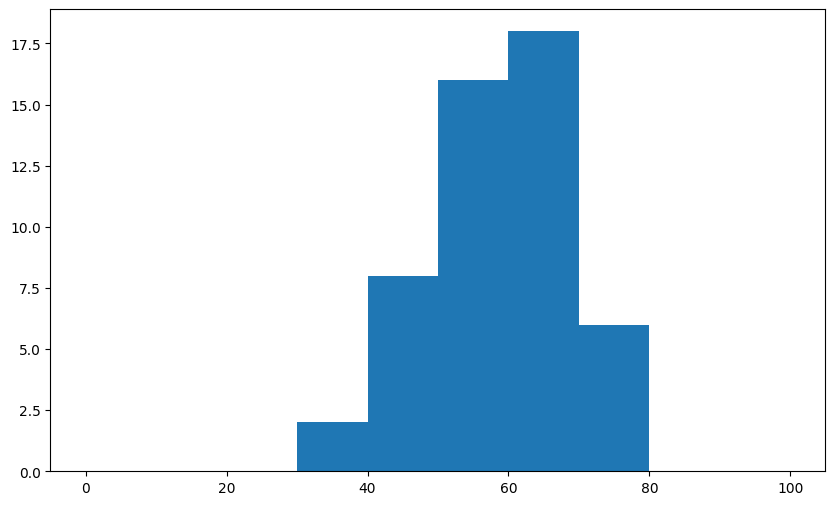

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(english_scores, bins=10, range=(0,100))

## 2차원 데이터

공분산 :
 - 공분산 : 2개의 연속형 변수의 관계성을 확인하는 통계량
 - 공분산이 0보다 클 때 : 변수 한쪽이 큰 값을 갖게되면 다른 한 쪽도 커짐
 - 공분산이 0보다 작을 때 : 변수 한쪽이 큰 값을 갖게되면 다른 한 쪽도 작아짐
 - 공분산이 0일 때 : 변수 사이에 관계성이 없음
 - 공분산은 편리한 지표지만 최대값이나 최소값이 얼마가 될 지 알 수가 없으며
 - 단위가 cm에서 m로 변하면 공분산의 값도 변함. 사용이 편하도록 -1 ~ +1의 범위로 보정

피어슨 상관계수 : 공분산을 최대값 1, 최소값 -1 사이가 되도록 표준화
 - cov / sp.sqrt(sigma_2_x * sigma_2_y)
 - 피어슨 상관계수 = 공분산 / x의 분산 곱하기 y의 분산의 루트
 - 상관행렬 : 여러 변수의 상관계수들을 행렬 형태로 정리
 - 상관계수가 무의미할 때 : 상관계수가 0에 가까운 값을 가질 때는 실제 그래프로 관계를 확인

In [ ]:
data1 = np.array([1,2,3,4,5])
data2 = np.array([5,4,3,2,1])

covariance_matrix = np.cov(data1, data2)
covariance = covariance_matrix[0,1]

print(covariance_matrix)
print(covariance)

[[ 2.5 -2.5]
 [-2.5  2.5]]
-2.5


공분산 행렬 (Covariance Matrix)
- 정의: 공분산 행렬은 여러 변수들 간의 공분산을 포함하는 정사각 행렬(정방행렬은 행과 열이 같은것). 공분산은 두 변수의 상호 변동성을 나타낸다. 즉, 한 변수가 증가할 때 다른 변수가 어떻게 변하는지를 보여준다.
- 계산:
$$ Cov(X, Y) = \frac{\sum_{i=1}^{n} (x_i - \mu_X) \cdot (y_i - \mu_Y)}{n - 1}$$

- 해석: 공분산이 양수이면 두 변수가 함께 증가. 공분산이 음수이면 한 변수가 증가할 때 다른 변수가 감소. 공분산의 크기는 변수들 간의 관계 강도를 정확히 나타내지 않으며, 단위에 의존적이다.

상관계수 행렬 (Correlation Matrix)
- 정의: 상관계수 행렬은 여러 변수들 간의 상관계수를 포함하는 정사각 행렬. 상관계수는 두 변수 간의 선형 관계의 강도와 방향을 나타낸다.
- 계산: 피어슨 상관계수는 다음 공식으로 계산
$$r_{xy} = \frac{\sum_{i=1}^{n} (x_i - \mu_X) \cdot (y_i - \mu_Y)}{\sqrt{\sum_{i=1}^{n} (x_i - \mu_X)^2} \cdot \sqrt{\sum_{i=1}^{n} (y_i - \mu_Y)^2}}$$
- 해석: 상관계수의 범위는 -1에서 +1까지이다.
+1은 완벽한 양의 선형 관계를, -1은 완벽한 음의 선형 관계를, 0은 선형 관계의 부재를 나타낸다. 상관계수는 두 변수 간 관계의 방향과 강도를 모두 나타내며, 단위에 영향을 받지 않는다.

In [ ]:
# Function to caculate covariance
def caculate_covariance(X, Y):
    if len(X) != len(Y):
        return "Data sets must be of equal length."

    n = len(X)
    mean_X = sum(X) / n
    mean_Y = sum(Y) / n

    covariance = sum((X[i] - mean_X) * (Y[i] - mean_Y) for i in range(n)) / (n-1)
    return covariance

# Example data
data1 = [1,2,3,4,5]
data2 = [5,4,3,2,1]

# Calculating the covariance
covariance = caculate_covariance(data1, data2)
print("Covariance:", covariance)

Covariance: -2.5


In [ ]:
def caculate_correlation(X, Y):
    if len(X) != len(Y):
        return "Data sets must be of equal length"

    n = len(X)
    mean_X = sum(X) / n
    mean_Y = sum(Y) / n

    numerator = sum((X[i] - mean_X) * (Y[i] - mean_Y) for i in range(n))
    denominator = (sum((X[i] - mean_X) ** 2 for i in range(n)) * sum((Y[i] - mean_Y) ** 2 for i in range(n))) ** 0.5

    if denominator == 0:
        return "Division by zero error in calculation."

    correlation_coefficient = numerator / denominator
    return correlation_coefficient

# Example data
data1 = [1,2,3,4,5]
data2 = [5,4,3,2,1]

# Calculating the correlation coefficient
correlation = caculate_correlation(data1,data2)
print("Correlation Coefficient:", correlation)

Correlation Coefficient: -1.0


Q. scores_df 에서 두 변수의 공분산과 상관계수를 구하세요.

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m3_분석라이브러리/통계/ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [ ]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(list('ABCDEFGHIJ'), name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


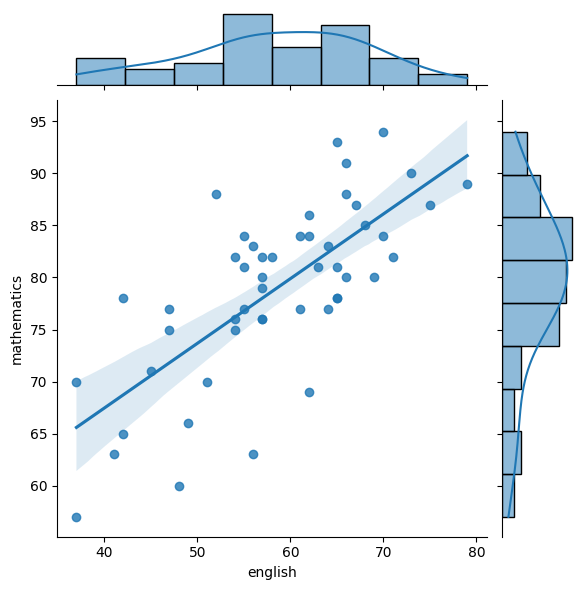

In [ ]:
# jointplot
import seaborn as sns
import matplotlib.pyplot as plt
sns.jointplot(data=df, x='english', y='mathematics', kind='reg')
plt.show()

In [ ]:
# 공분산
# np.var() 함수 : 이 함수는 분산을 계산할 때 기본적으로 ddof=0을 사용하는 반면(표본분산)
# np.cov() 함수 : 이 함수는 공분산을 계산할 때 기본적으로 ddof=1을 사용(불편분산)
cov = np.cov(en_scores, ma_scores, ddof=0) # 표본분산
# cov = np.cov(en_scores, ma_scores, ddof=1) # 불편분산(불편분산이 보통 더 큰것)
cov[0,1]

62.800000000000004

In [ ]:
# 공분산
cov = np.cov(en_scores, ma_scores, ddof=0) # 표본분산
cov = np.cov(en_scores, ma_scores)
cov[0,1]

In [ ]:
# 상관계수
cor = np.corrcoef(en_scores, ma_scores)
cor[0,1]

0.8185692341186712

In [ ]:
import pandas as pd
import numpy as np

# 제공된 데이터
en_scores = np.array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])
ma_scores = np.array([65, 80, 63, 63, 76, 60, 81, 66, 78, 82])

# 데이터프레임 생성
scores_df = pd.DataFrame({'english': en_scores, 'mathematics': ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='student'))

# 공분산 계산
covariance = scores_df.cov()

# 상관계수 계산
correlation = scores_df.corr()

covariance, correlation



(               english  mathematics
 english      95.555556    69.777778
 mathematics  69.777778    76.044444,
               english  mathematics
 english      1.000000     0.818569
 mathematics  0.818569     1.000000)

In [ ]:
data1 = np.array([1,2,3,4,5])
data2 = np.array([5,4,3,2,1])

covariance_matrix = np.cov(data1, data2)
covariance = covariance_matrix[0,1]

print(covariance_matrix)
print(covariance)

Q. 타이타닉 데이터셋에서 age, fare 컬럼을 선택하여 공분산 행렬, 공분산, 상관계수 행렬 및 상관계수를 각각 구하여 비교하세요.

In [ ]:
# A.
titanic = sns.load_dataset('titanic')
print(titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [ ]:
import seaborn as sns
import pandas as pd

titanic2 = titanic[['age','fare']]
print(titanic2)

      age     fare
0    22.0   7.2500
1    38.0  71.2833
2    26.0   7.9250
3    35.0  53.1000
4    35.0   8.0500
..    ...      ...
886  27.0  13.0000
887  19.0  30.0000
888   NaN  23.4500
889  26.0  30.0000
890  32.0   7.7500

[891 rows x 2 columns]


In [ ]:
corr = titanic2.corr()
print(corr)

           age      fare
age   1.000000  0.096067
fare  0.096067  1.000000


In [ ]:
# A. 용규님 솔루션
import seaborn as sns

titanic = sns.load_dataset('titanic')
data = titanic[['age', 'fare']].dropna()
print(data)

cov = data.cov()
corr = data.corr()

print("공분산 행렬:")
print(cov)
print("\n상관계수 행렬:")
print(corr)
print("\n공분산:")
print(cov.iloc[0,1])
print("\n상관계수:")
print(corr.iloc[0,1])

      age     fare
0    22.0   7.2500
1    38.0  71.2833
2    26.0   7.9250
3    35.0  53.1000
4    35.0   8.0500
..    ...      ...
885  39.0  29.1250
886  27.0  13.0000
887  19.0  30.0000
889  26.0  30.0000
890  32.0   7.7500

[714 rows x 2 columns]
공분산 행렬:
             age        fare
age   211.019125    73.84903
fare   73.849030  2800.41310

상관계수 행렬:
           age      fare
age   1.000000  0.096067
fare  0.096067  1.000000

공분산:
73.84902981461926

상관계수:
0.09606669176903912


In [ ]:
titanic = sns.load_dataset('titanic')
data = titanic[['age','fare']]

cov = data.cov()
corr = data.corr()

print(cov)
print(corr)
print(cov.iloc[0,1])
print(corr.iloc[0,1])

             age         fare
age   211.019125    73.849030
fare   73.849030  2469.436846
           age      fare
age   1.000000  0.096067
fare  0.096067  1.000000
73.84902981461939
0.09606669176903912


In [ ]:
# Q. 타이타닉 데이터셋에서 age, fare 를 선택, 공분산 행렬, 상관계수 행렬
import seaborn as sns

titanic = sns.load_dataset('titanic')
data = titanic[['age', 'fare']].dropna()

cov = data.cov()
corr = data.corr()

print("공분산 행렬:")
print(cov)
print("\n상관계수 행렬:")
print(corr)
print("\n공분산:")
print(cov.iloc[0,1])
print("\n상관계수:")
print(corr.iloc[0,1])

공분산 행렬:
             age        fare
age   211.019125    73.84903
fare   73.849030  2800.41310

상관계수 행렬:
           age      fare
age   1.000000  0.096067
fare  0.096067  1.000000

공분산:
73.84902981461926

상관계수:
0.09606669176903912


Q1_0118. english와 mathematices 2차원 데이터간의 관계를 시각화하여 탐색하세요.
- histogram
- boxplot
- scatter plot(regplot, lmplot)
- jointplot
- heatmap

In [ ]:
# Q1_0118 솔루션
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m3_분석라이브러리/통계/ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


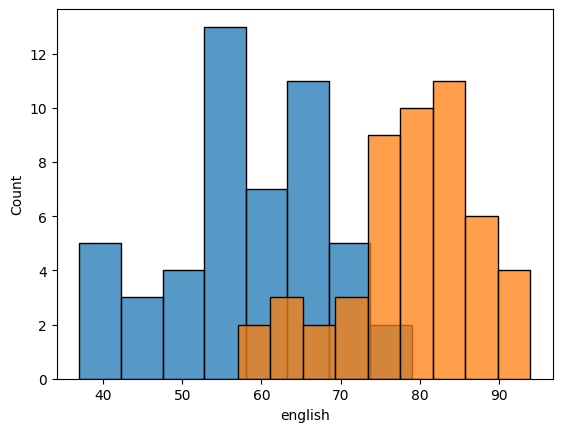

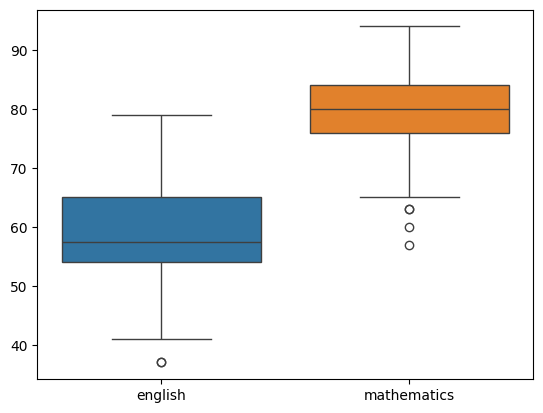

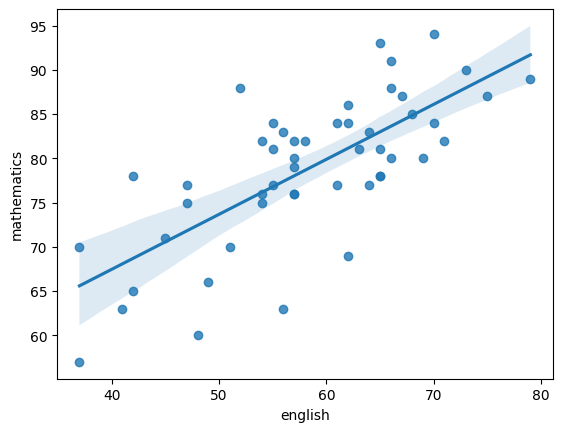

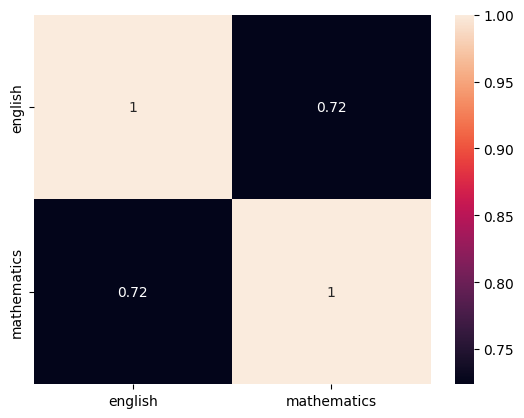

In [ ]:
import seaborn as sns
sns.histplot(df['english'])
sns.histplot(df['mathematics'])
plt.show()

sns.boxplot(data=df)
plt.show()

sns.regplot(x='english', y='mathematics', data=df)
plt.show()

sns.heatmap(df.corr(), annot=True)
plt.show()

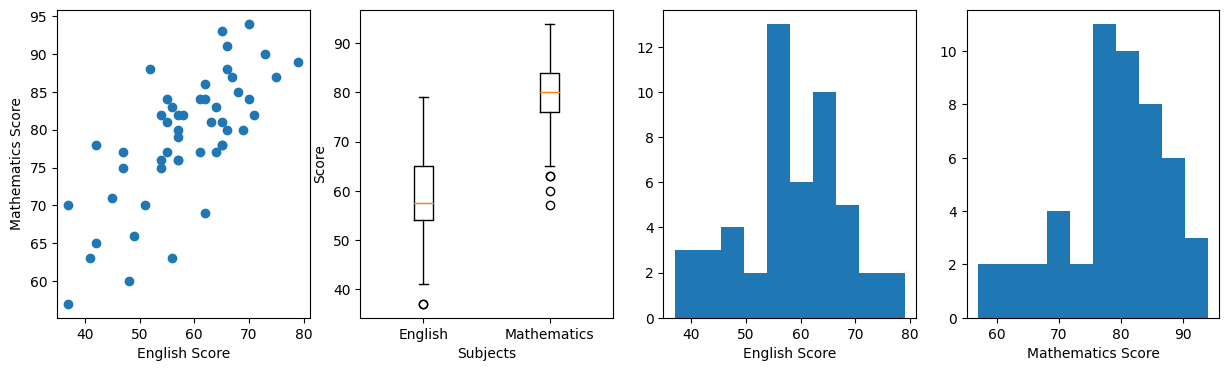

In [ ]:
# A. 수학 영어 살펴보기 주승님 솔루션
score = pd.read_csv("/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m3_분석라이브러리/통계/ch2_scores_em.csv")
score.set_index('student number', inplace = True)
import matplotlib.pyplot as plt

# 데이터프레임 df를 사용합니다
plt.figure(figsize=(15, 4))
plt.subplots_adjust(hspace=0.5)

# Scatterplot
plt.subplot(1, 4, 1)
plt.xlabel('English Score')
plt.ylabel('Mathematics Score')
plt.scatter(x=df['english'], y=df['mathematics'])

# Boxplot
plt.subplot(1, 4, 2)
plt.xlabel('Subjects')
plt.ylabel('Score')
plt.boxplot([df['english'], df['mathematics']], labels=['English', 'Mathematics'])

# Histogram for English
plt.subplot(1, 4, 3)
plt.xlabel('English Score')
plt.hist(df['english'])

# Histogram for Mathematics
plt.subplot(1, 4, 4)
plt.xlabel('Mathematics Score')
plt.hist(df['mathematics'])

plt.show()


In [ ]:
plt.figure(figsize=(15, 4))
plt.subplots_adjust(hspace = 0.5) # plt.subplots 간격조정

# scatterplot
plt.subplot(1,4,1)
plt.xlabel('english score')
plt.ylabel('mathematics score')
plt.scatter(x = score['english'], y = score['mathematics'])

# boxplot
plt.subplot(1,4,2)
plt.xlabel('1: english  2: mathematics')
plt.ylabel('score')
plt.boxplot(score)

# histogram
plt.subplot(1,4,3)
plt.xlabel('english score')
plt.hist(x = score['english'])

# histogram
plt.subplot(1,4,4)
plt.xlabel('mathematics score')
plt.hist(x = score['mathematics'])

Text(0.5, 1.0, 'Heatmap')

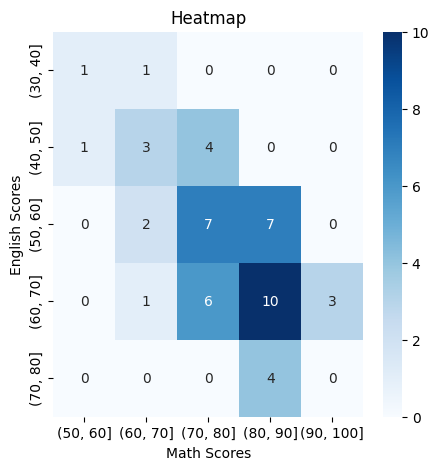

In [ ]:
en_scores = np.array(df['english'])
ma_scores = np.array(df['mathematics'])

heat_df = pd.DataFrame({'English Scores': en_scores, 'Math Scores': ma_scores})

# x축과 y축 구간을 10점 간격으로 나누어 히트맵 생성
heatmap_data = pd.crosstab(pd.cut(heat_df['English Scores'], bins=np.arange(0, 101, 10)),
                            pd.cut(heat_df['Math Scores'], bins=np.arange(0, 101, 10)))

# 히트맵 그리기
plt.figure(figsize=(5,5))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap')


Q2_0118. 주어진 숫자 배열(예: [4,8,15,16,23,42])에 대해 평균과 중앙값을 계산한 후 배열에 두 개의 극단값을 추가한 후(예: -100, 100), 다시 평균과 중앙값을 계산하고 비교하세요.

In [ ]:
# Q2_0118 솔루션
import numpy as np

numbers = np.array([4, 8, 15, 16, 23, 42])

# 평균과 중앙값 계산
mean_original = np.mean(numbers)
median_original = np.median(numbers)

# 극단값을 추가한 후의 배열
numbers_extreme = np.append(numbers, [-100, 100])

# 극단값을 추가한 후의 평균과 중앙값 계산
mean_extreme = np.mean(numbers_extreme)
median_extreme = np.median(numbers_extreme)

print("원래 평균:", mean_original)
print("원래 중앙값:", median_original)
print("극단값 추가 평균:", mean_extreme)
print("극단값 추가 중앙값:", median_extreme)

원래 평균: 18.0
원래 중앙값: 15.5
극단값 추가 평균: 13.5
극단값 추가 중앙값: 15.5


Q3_0118. 아래 두개의 데이터로 공분산(convariance)과 상관계수를 계산하세요.
- data1=[65,72,78,65,72,70,65,68]
- data2=[72,69,74,66,70,75,65,72]

In [ ]:
# Q3_0118 신미님 솔루션
data1 = np.array([65, 72, 78, 65, 72, 70, 65, 68])
data2 = np.array([72, 69, 74, 66, 70, 75, 65, 72])

dt3_cov_mat = np.cov(data1, data2)
dt3_covariance = dt3_cov_mat[0,1]

print("공분산 행렬 :\n", dt3_cov_mat, '\n')
print("공분산 값 :", dt3_covariance)

공분산 행렬 :
 [[21.125       8.98214286]
 [ 8.98214286 12.83928571]] 

공분산 값 : 8.982142857142856


In [ ]:
# Q3_0118 솔루션
data1 = np.array([65, 72, 78, 65, 72, 70, 65, 68])
data2 = np.array([72, 69, 74, 66, 70, 75, 65, 72])
print(np.cov(data1,data2, ddof=0)[0,1]) # 공분산
print(np.corrcoef(data1, data2)[0,1]) # 상관계수

7.859375
0.5453950193321363


Q4_0118. 두 개의 변수를 갖는 데이터셋(예: 사람의 키와 몸무게) 을 생성한 후 두 변수 간의 피어슨 상관계수를 계산하여 그들 사이의 선형 관계를 분석하세요.

0.7783680217978641

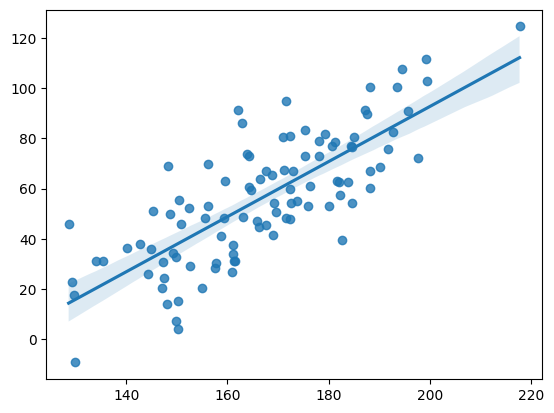

In [ ]:
# Q4_0118 유빈님 솔루션
heights = np.random.normal(165,20,100)
weights = heights - 110 + np.random.normal(0,15,100)
sns.regplot(x=heights, y=weights)
np.corrcoef(heights,weights)[0,1]

# 선형 관계 분석 : 키와 몸무게가 양의 상관 관계. 약 0.8 나오는것으로 높게 나오는 것을 볼 수 있음

# 첫 번째 행, 첫 번째 열 (위치 [0, 0])의 값은 첫 번째 변수(여기서는 heights)의 자기 상관계수입니다. 이 값은 항상 1입니다.
# 두 번째 행, 두 번째 열 (위치 [1, 1])의 값은 두 번째 변수(여기서는 weights)의 자기 상관계수입니다. 이 값도 항상 1입니다.
# 첫 번째 행, 두 번째 열 (위치 [0, 1])과 두 번째 행, 첫 번째 열 (위치 [1, 0])의 값은 두 변수 간의 피어슨 상관계수입니다. 이 두 값은 서로 같습니다.
# 따라서, np.corrcoef(heights, weights)[0, 1]은 heights와 weights 두 변수 간의 피어슨 상관계수를 선택하여 반환하는 것입니다. 이 값은 두 변수 간의 선형 관계의 강도를 나타냅니다. 값이 1에 가까우면 강한 양의 선형 관계를, -1에 가까우면 강한 음의 선형 관계를, 0에 가까우면 선형 관계가 약하거나 없음을 의미합니다.


Q5_0118. 주어진 데이터 배열의 사분위수(제1사분위수, 중앙값, 제3사분위수)를 계산한 후 데이터의 10번째 백분위수와 90번째 백분위수를 계산하여 출력하세요.
- data = np.arange(1000)

In [ ]:
# Q5_0118 솔루션
# 주어진 데이터 배열
data = np.arange(1,1001)

# 사분위수 (제 1사분위수, 중앙값, 제3사분위수) 계산
quartiles = np.percentile(data, [25,50,75])

# 10번째 백분위수와 90번째 백분위수 계산
percentile_10 = np.percentile(data, 10)
percentile_90 = np.percentile(data,90)
print(quartiles, percentile_10, percentile_90)

# 출력값이 [250.75 500.5  750.25] 100.9 900.1 이렇게 실수인 이유는..
# 1~1001 은 1000개인데 짝수이므로 두개 더해서 나누기 2 하면 저렇게됨

[250.75 500.5  750.25] 100.9 900.1


Q6_0118. 아래 데이터를 0~1 범위로 조정하여 정규화 하여 출력하세요.
- data = np.array([[1],[2],[3],[4],[5]])

In [ ]:
# 최소~최대 조정은 각 특성을 주어진 범위(일반적으로 0~1)로 조정하여 특성을 변환
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data = np.array([[1], [2], [3], [4], [5]])
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.  ],
       [0.25],
       [0.5 ],
       [0.75],
       [1.  ]])

Q7_0118. Z-점수 정규화를 사용하여 주어진 데이터 배열을 표준화하세요.(평균이 0이고 분산이 1이 되도록 특성의 크기를 조정)
- data =np.array([[1],[2],[3],[4],[5]])

In [ ]:
# Q7_0118 솔루션
data = np.arange(1,6).reshape(-1,1)
z_data = (data - np.mean(data)) / np.std(data)
z_data, round(z_data.mean(),2), round(np.var(z_data),2)

(array([[-1.41421356],
        [-0.70710678],
        [ 0.        ],
        [ 0.70710678],
        [ 1.41421356]]),
 0.0,
 1.0)

In [ ]:
# Z-점수 정규화를 사용하여 주어진 데이터 배열을 표준화. 표준화는 평균이0 이고 분산이 1이 되도록 특성의 크기를 조정
from sklearn.preprocessing import StandardScaler

data = np.array([[1],[2],[3],[4],[5]])
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
standardized_data

array([[-1.41421356],
       [-0.70710678],
       [ 0.        ],
       [ 0.70710678],
       [ 1.41421356]])

선형 회귀 모델은 여러 중요한 가정에 기반하며 이 가정들이 충족될 때, 선형 회귀 분석은 가장 효과적

선형성 (Linearity)
- 의미: (y=ax+b에서)선형 회귀의 가장 기본적인 가정은 종속 변수(y)와 독립 변수(x) 간의 관계가 선형적이라는 것. 즉, 독립 변수의 변화가 종속 변수의 변화를 선형적으로 설명할 수 있어야 한다.
- 검증 방법: 산점도(Scatter plot)를 통해 독립 변수와 종속 변수 간의 관계를 시각적으로 확인할 수 있다. 선형 패턴을 보이면 이 가정이 충족된 것으로 볼 수 있다.

독립성 (Independence)
- 의미: 독립 변수들이 서로 독립적이라는 가정. 즉, 모델의 어떤 한 독립 변수가 다른 독립 변수에 의존해서는 안 된다.
- 검증 방법: 독립성은 다중공선성(Multicollinearity)의 부재를 통해 검증. 다중공선성은 변수 간 상관관계가 높은 경우 발생하며, 이를 검증하기 위해 상관 계수 행렬이나 분산팽창계수(Variance Inflation Factor, VIF)를 사용할 수 있다.

정규성 및 등분산성 (Normality and Homoscedasticity)
- 정규성: 오차 항이 정규 분포를 따른다는 가정. 이는 통계적 추정과 검정이 유효하게 작동하기 위해 중요.
- 등분산성: 오차 항이 모든 독립 변수 값에 대해 일정한 분산을 가져야 한다는 가정. 이를 '등분산성' 또는 'Homoscedasticity'라고 합니다.

이 세 가지 가정은 선형 회귀 모델이 데이터를 잘 설명하고, 추정이 신뢰할 수 있는지 판단하는 데 핵심. 가정들이 충족되지 않는 경우, 데이터 변환, 다른 종류의 회귀 모델 사용 등의 방법으로 문제를 해결할 수 있다.

데이터 스케일링 및 정규화


In [ ]:
scores = pd.read_csv('/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m3_분석라이브러리/통계/ch2_scores_em.csv', index_col='student number')
scores.head()

In [ ]:
scores = [42, 69, 56, 41, 57, 48, 65, 49, 65, 58]
scores = np.array(scores)
print(scores)
print(f'평균: {scores.mean()}, 표준편차: {scores.std().round(4)}')

[42 69 56 41 57 48 65 49 65 58]
평균: 55.0, 표준편차: 9.2736


In [ ]:
# 표준화
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [ ]:
# 평균 + z*scores.표준편차 # 걍 공식임
55.0 + z*scores.std()
# z = (scores - np.mean(scores)) / np.std(scores) 이식에서 분모 옮기고 머하고 하면 식나옴

array([42., 69., 56., 41., 57., 48., 65., 49., 65., 58.])

In [ ]:
# 표준화 과정을 통해 체중과 키 데이터가 평균 0 주변에서 어떻게 분포하는지를 확인
# 표준화를 위한 데이터셋: 체중(kg)과 키(cm)
weights = np.array([55, 80, 65])
heights = np.array([160, 175, 168])

# 체중과 키 표준화
stdev_weights = (weights - np.mean(weights)) / np.std(weights)
stdev_heights = (heights - np.mean(heights)) / np.std(heights)

stdev_weights, stdev_heights

(array([-1.13554995,  1.29777137, -0.16222142]),
 array([-1.25103507,  1.19664225,  0.05439283]))

In [ ]:
# 정규화 과정을 통해 주택 가격과 크기 데이터가 0과 1사이의 범위로 조정
# 정규화를 위한 데이터셋: 주택 가격(백만 원)과 주택 크기(제곱미터)
prices = np.array([500, 800, 650])
sizes = np.array([50, 75, 70])

# 주택 가격과 크기 정규화
normalized_prices = (prices - np.min(prices)) / (np.max(prices) - np.min(prices))
normalized_sizes = (sizes - np.min(sizes)) / (np.max(sizes) - np.min(sizes))

normalized_prices, normalized_sizes

# 정규화 공식: (prices - min(prices)) / (max(prices) - min(prices))
# 구체적으로 계산하면:

# 500의 정규화 값:
# ((500 - 500) / (800 - 500)) = (0 / 300) = 0
# 800의 정규화 값:
# ((800 - 500) / (800 - 500)) = (300 / 300) = 1
# 650의 정규화 값:
# ((650 - 500) / (800 - 500)) = (150 / 300) = 0.5
# 따라서, 정규화된 prices 배열은 [0, 1, 0.5]가 됩니다.

(array([0. , 1. , 0.5]), array([0. , 1. , 0.8]))

표준화
- 데이터가 평균을 중심으로 어떻게 분포하는지를 보여준다.
- 이는 변수 간의 관계를 비교하는 데 유용하며, 체중과 키의 상관관계를 더 명확하게 파악
- 표준화는 데이터를 중심화하고 척도를 일관되게 만들어 준다.

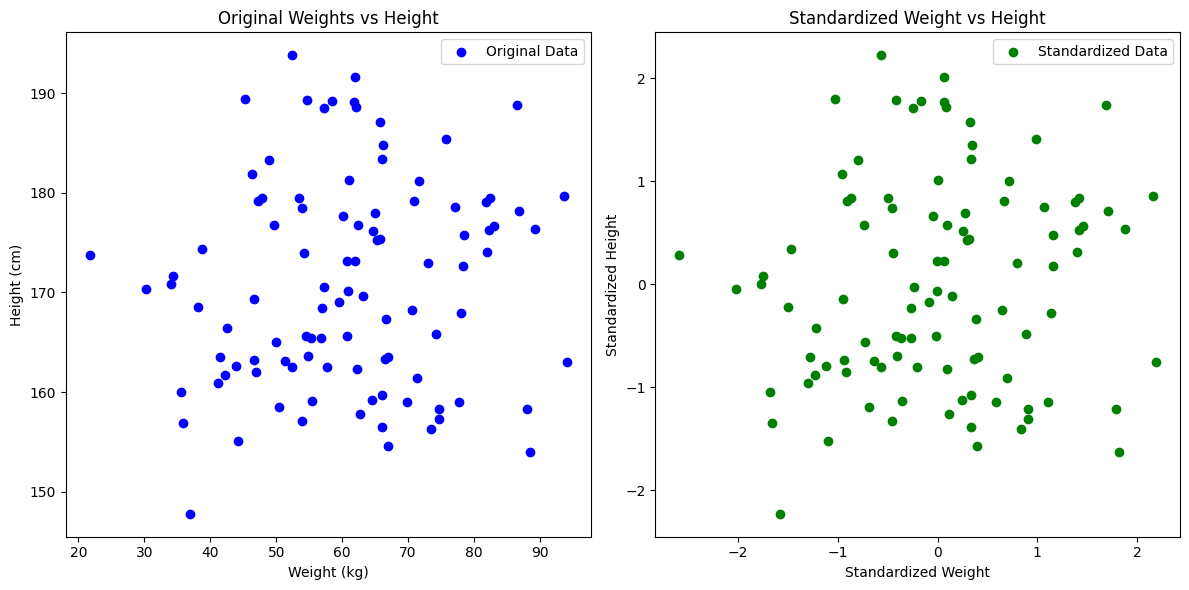

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 확장된 데이터셋 생성
np.random.seed(0)
weights_expanded = np.random.normal(60, 15, 100) # 평균 60kg, 표준편차 15kg의 체중 데이터
heights_expanded = np.random.normal(170, 10, 100) # 평균 170cm, 표준편차 10cm의 키 데이터

# 표준화
standardized_weights_expanded = (weights_expanded - np.mean(weights_expanded)) / np.std(weights_expanded)
standardized_heights_expanded = (heights_expanded - np.mean(heights_expanded)) / np.std(heights_expanded)
# 시각화
plt.figure(figsize=(12, 6))

# 원본 체중과 키 데이터 플롯
plt.subplot(1, 2, 1)
plt.scatter(weights_expanded, heights_expanded, color='blue', label='Original Data')
plt.title('Original Weights vs Height')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.legend()

# 표준화된 체중과 키 데이터 플롯
plt.subplot(1, 2, 2)
plt.scatter(standardized_weights_expanded, standardized_heights_expanded, color='green', label='Standardized Data')
plt.title('Standardized Weight vs Height')
plt.xlabel('Standardized Weight')
plt.ylabel('Standardized Height')
plt.legend()

plt.tight_layout()
plt.show()

Q1_0119. 주어진 주택가격과 크기 데이터를 정규화 및 시각화
- prices_expanded = np.random.uniform(100, 1000, 100)
- sizes_expanded = np.random.uniform(20, 150, 100)

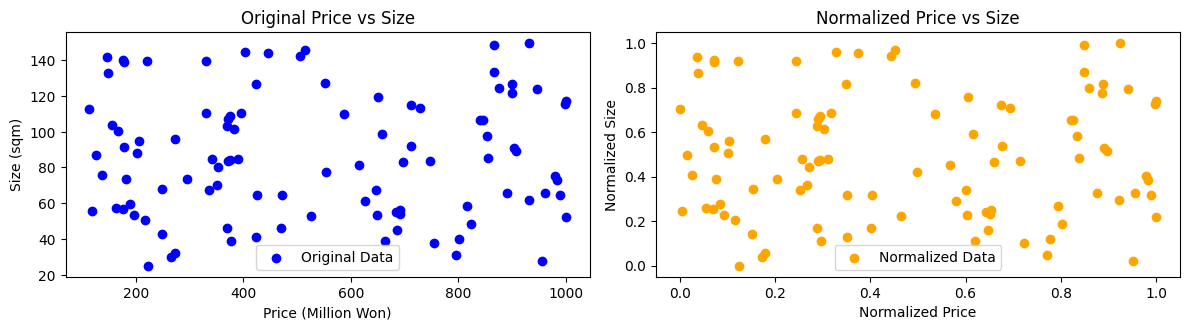

In [2]:
# 정규화를 위한 확장된 데이터셋
prices_expanded = np.random.uniform(100, 1000, 100) # 100만원에서 1000만원 사이의 주택 가격 데이터
sizes_expanded = np.random.uniform(20, 150, 100)   # 20제곱미터에서 150제곱미터 사이의 주택 크기 데이터

# 정규화
normalized_prices_expanded = (prices_expanded - np.min(prices_expanded)) / (np.max(prices_expanded) - np.min(prices_expanded))
normalized_sizes_expanded = (sizes_expanded - np.min(sizes_expanded)) / (np.max(sizes_expanded) - np.min(sizes_expanded))
plt.figure(figsize=(12, 6))

# 원본 주택 가격과 크기 데이터 플롯
plt.subplot(2, 2, 3)
plt.scatter(prices_expanded, sizes_expanded, color='blue', label='Original Data')
plt.title('Original Price vs Size')
plt.xlabel('Price (Million Won)')
plt.ylabel('Size (sqm)')
plt.legend()

# 정규화된 주택 가격과 크기 데이터 플롯
plt.subplot(2, 2, 4)
plt.scatter(normalized_prices_expanded, normalized_sizes_expanded, color='orange', label='Normalized Data')
plt.title('Normalized Price vs Size')
plt.xlabel('Normalized Price')
plt.ylabel('Normalized Size')
plt.legend()

plt.tight_layout()
plt.show()

로그변환
- 통계적 기법들은 데이터가 정규 분포를 따른다고 가정. 그러나 실제 데이터는 종종 비대칭적이거나 긴 꼬리를 가진 분포를 보이며 로그 변환은 이러한 데이터를 더 정규분포에 가깝게 만들어, 통계적 분석을 용이하게 한다.
- 로그 변환은 비선형 관계를 선형 관계로 변환하여, 선형 모델(예: 선형 회귀)을 적용할 수 있게 해준다.
- 데이터의 분산을 안정화시키는 효과가 있다. 특히, 큰 값에 의해 영향을 많이 받는 데이터(예: 소득, 인구)에서 유용. 로그 변환 후, 데이터 포인트들은 더 균일한 분산을 갖게 된다.
- 데이터의 소수 값(작은 값)을 증폭시켜, 이러한 값들이 분석에서 더 잘 드러나게 한다.


- 값이 0이 될 수 있는 데이터세트에서는 log(0)이 유효한 작업이 아니기 때문에 0 값에 대해 직접 로그 변환(np.log 사용)이 정의되지 않는다.
- np.log1p를 사용하면 log(1+0)=0처럼 수학적 오류 없이 0 값을 변환

In [ ]:
import numpy as np

# Sample data which includes a zero
data = np.array([0, 0.01, 0.1, 1, 10])

# Applying log1p transformation
log1p_transformed_data = np.log1p(data)
log1p_transformed_data

array([0.        , 0.00995033, 0.09531018, 0.69314718, 2.39789527])

로그 변환이 편향된 데이터의 분포에 어떻게 영향을 미칠 수 있는지 시각화하여 데이터를 보다 대칭적으로 만들고 추가 통계 분석 또는 기계 학습 모델링에 더 적합하게 만드는데 도움

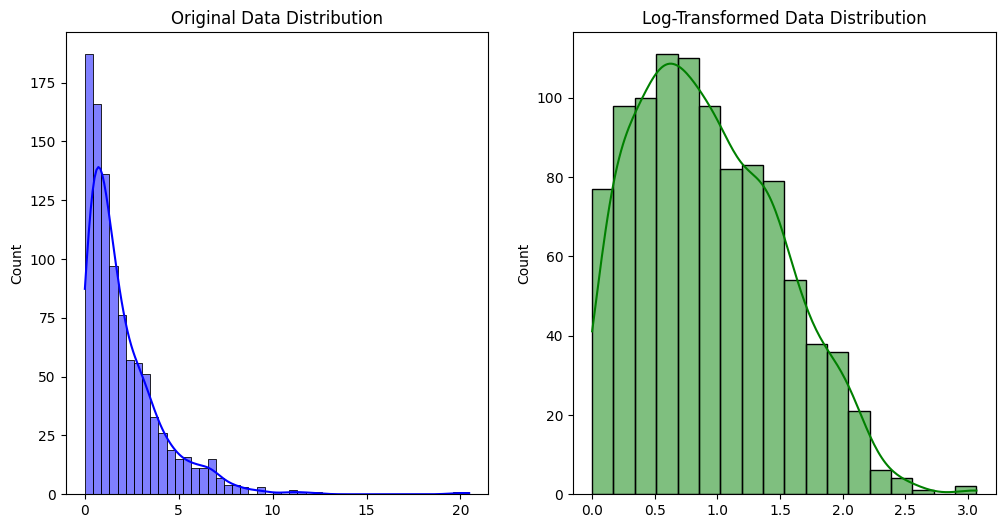

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generating a random dataset with a skewed distribution (using exponential distribution)
data = np.random.exponential(scale=2.0, size=1000)
# 평균이 2.0인 지수 분포에서 1000개의 독립적인 난수, log 함수에서는 scale의 역수가 평균.(0.5)

# Plotting the original data distribution
plt.figure(figsize=(12,6))

# First subplot for the original data
plt.subplot(1, 2, 1)
sns.histplot(data, kde=True, color='blue')
plt.title("Original Data Distribution")

# Applying log transformation to the data
# np.log1p is used to handle the log transformation of data including zero values
log_transformed_data = np.log1p(data)

# Second subplot for the log-transformed data
plt.subplot(1, 2, 2)
sns.histplot(log_transformed_data, kde=True, color='green')
plt.title("Log-Transformed Data Distribution")

# Display the plots
plt.show()

Q2_0119. 아래 데이터를 원본과 로그 변환한 결과를 1행 2열의 형태로 시각화 하세요.
- data = np.random.exponential(scale=20.0, size=999)

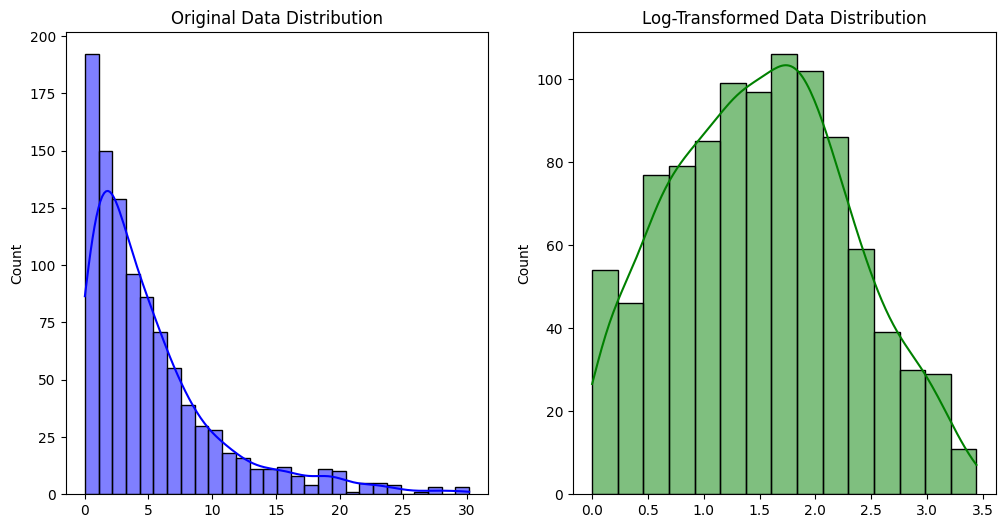

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generating a random dataset with a skewed distribution (using exponential distribution)
data = np.random.exponential(scale=5.0, size=999)

# Plotting the original data distribution
plt.figure(figsize=(12, 6))

# First subplot for the original data
plt.subplot(1, 2, 1)
sns.histplot(data, kde=True, color='blue')
plt.title("Original Data Distribution")

# Applying log transformation to the data
# np.log1p is used to handle the log transformation of data including zero values
log_transformed_data = np.log1p(data)

# Second subplot for the log-transformed data
plt.subplot(1, 2, 2)
sns.histplot(log_transformed_data, kde=True, color='green')
plt.title("Log-Transformed Data Distribution")

# Display the plots
plt.show()